In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fancyimpute import KNN

# Load train and test data

In [2]:
def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test

In [3]:
train, test = load_data()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Splitting into features and target

In [6]:
def split_data(train):
    features = train.iloc[:,:12]
    target = train['Loan_Status']
    return features, target

In [7]:
features, target = split_data(train)

In [8]:
features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [9]:
target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# Sneak peek at the data

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Data preprocessing

In [14]:
def preprocessing(data):
    data.Gender = data.Gender.map({'Male':1, 'Female':0})
    data.Married = data.Married.map({'Yes':1, 'No':0})
    data.Dependents = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
    data.Education = data.Education.map({'Graduate':1, 'Not Graduate':0})
    data.Self_Employed = data.Self_Employed.map({'No':1,'Yes':0})
    data.Property_Area = data.Property_Area.map({'Semiurban':2,'Urban':1,'Rural':0})
    return data   

In [15]:
features_new = preprocessing(features.iloc[:,1:])
features_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,1


In [16]:
test_new = preprocessing(test)
test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,1.0,5720,0,110.0,360.0,1.0,1
1,LP001022,1.0,1,1.0,1,1.0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1.0,1,2.0,1,1.0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1.0,1,2.0,1,1.0,2340,2546,100.0,360.0,NaN,1
4,LP001051,1.0,0,0.0,0,1.0,3276,0,78.0,360.0,1.0,1


In [17]:
target = target.map({'Y':1, 'N':0})
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [18]:
columns = features_new.columns
for col in columns:
    print(features_new[col].value_counts())

1.0    489
0.0    112
Name: Gender, dtype: int64
1.0    398
0.0    213
Name: Married, dtype: int64
0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
1    480
0    134
Name: Education, dtype: int64
1.0    500
0.0     82
Name: Self_Employed, dtype: int64
2500     9
4583     6
2600     6
6000     6
5000     5
4166     5
3333     5
3750     5
2400     4
8333     4
2583     4
6250     4
3500     3
5417     3
3000     3
2333     3
10000    3
3166     3
3167     3
4000     3
4333     3
3400     3
4750     2
3173     2
4300     2
5500     2
3510     2
3717     2
2917     2
3466     2
        ..
2755     1
4735     1
2720     1
3716     1
9357     1
2698     1
2699     1
3727     1
4755     1
2708     1
4758     1
14999    1
15000    1
2717     1
2718     1
674      1
3775     1
3748     1
5124     1
5829     1
5800     1
2149     1
3762     1
4931     1
5815     1
5818     1
5819     1
5821     1
2750     1
3691     1
Name: ApplicantIncome, Length: 505, dtype: int64
0.

# Data visualization

In [19]:
import seaborn as sns
def correlation(feat):
    sns.heatmap(feat.corr())
    plt.show()

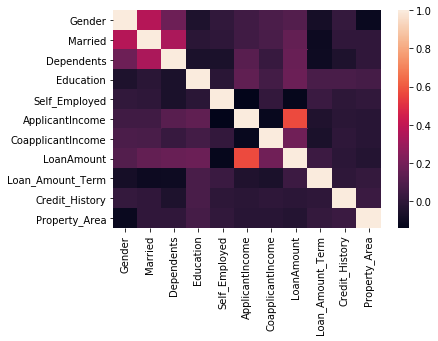

In [20]:
correlation(features_new)

In [21]:
def countplot(feat):
    cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
    for col in cols:
        sns.countplot(x=col, data=feat)
        plt.show()

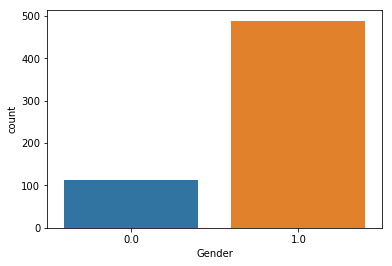

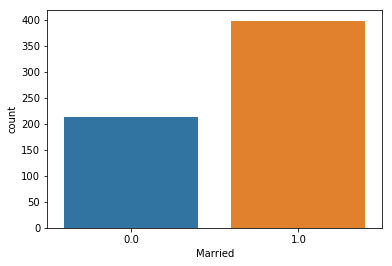

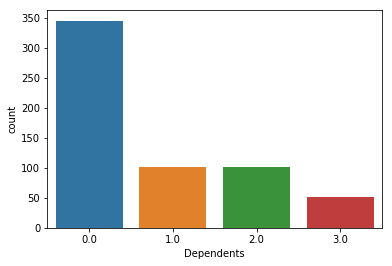

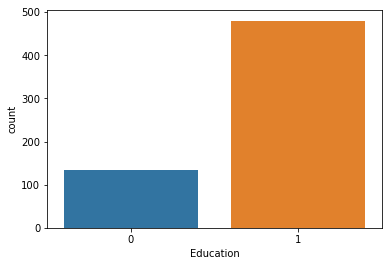

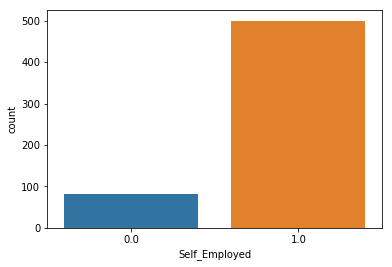

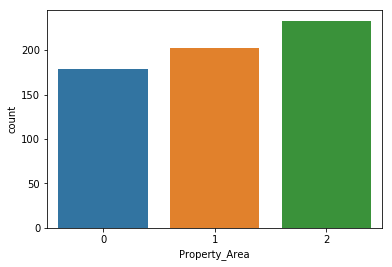

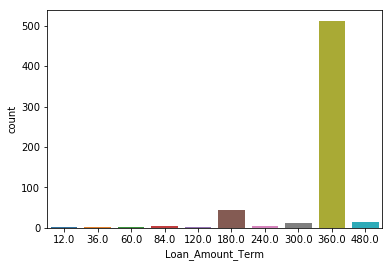

In [22]:
countplot(features_new)

In [23]:
def feat_and_tar(feat, tar):
    cols = ['Self_Employed', 'ApplicantIncome','CoapplicantIncome']
    for col in cols:
        sns.regplot(feat[col], tar, fit_reg=False)
        plt.show()

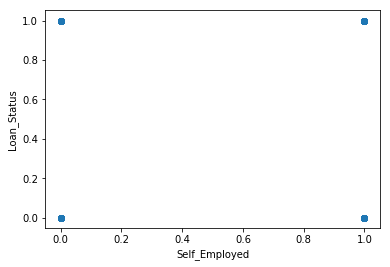

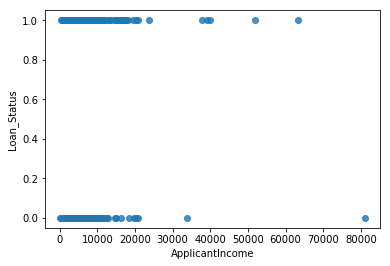

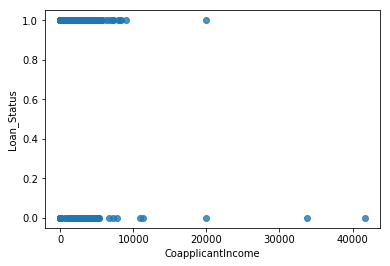

In [24]:
feat_and_tar(features_new, target)

#  Missing value imputation by K-nearest neighbors

In [25]:
def missing_impute_values(data):
    new = KNN(k=7).complete(data)
    return new

In [26]:
features_new_2 = missing_impute_values(features_new)
features_new_2

Imputing row 1/614 with 1 missing, elapsed time: 0.099
Imputing row 101/614 with 0 missing, elapsed time: 0.101
Imputing row 201/614 with 0 missing, elapsed time: 0.102
Imputing row 301/614 with 0 missing, elapsed time: 0.102
Imputing row 401/614 with 0 missing, elapsed time: 0.103
Imputing row 501/614 with 0 missing, elapsed time: 0.105
Imputing row 601/614 with 2 missing, elapsed time: 0.110


array([[   1.,    0.,    0., ...,  360.,    1.,    1.],
       [   1.,    1.,    1., ...,  360.,    1.,    0.],
       [   1.,    1.,    0., ...,  360.,    1.,    1.],
       ..., 
       [   1.,    1.,    1., ...,  360.,    1.,    1.],
       [   1.,    1.,    2., ...,  360.,    1.,    1.],
       [   0.,    0.,    0., ...,  360.,    0.,    2.]])

In [27]:
test_new_2 = missing_impute_values(test_new.iloc[:,1:])
test_new_2

Imputing row 1/367 with 0 missing, elapsed time: 0.037
Imputing row 101/367 with 0 missing, elapsed time: 0.038
Imputing row 201/367 with 0 missing, elapsed time: 0.040
Imputing row 301/367 with 0 missing, elapsed time: 0.042


array([[   1.        ,    1.        ,    0.        , ...,  360.        ,
           1.        ,    1.        ],
       [   1.        ,    1.        ,    1.        , ...,  360.        ,
           1.        ,    1.        ],
       [   1.        ,    1.        ,    2.        , ...,  360.        ,
           1.        ,    1.        ],
       ..., 
       [   1.        ,    0.        ,    0.        , ...,  360.        ,
           0.89462541,    2.        ],
       [   1.        ,    1.        ,    0.        , ...,  360.        ,
           1.        ,    0.        ],
       [   1.        ,    0.        ,    0.        , ...,  180.        ,
           1.        ,    0.        ]])

# Feature Engineering

In [28]:
new_features = pd.DataFrame(features_new_2,columns=features_new.columns)
new_test = pd.DataFrame(test_new_2, columns=test_new.columns[1:])

In [29]:
new_features['Total income/Loan amount'] = (new_features['ApplicantIncome'] + new_features['CoapplicantIncome'])/ new_features['LoanAmount']              
new_features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount
0,1.0,0.0,0.0,1.0,1.0,5849.0,0.0,143.200668,360.0,1.0,1.0,40.844781
1,1.0,1.0,1.0,1.0,1.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,47.585938
2,1.0,1.0,0.0,1.0,0.0,3000.0,0.0,66.000000,360.0,1.0,1.0,45.454545
3,1.0,1.0,0.0,0.0,1.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,41.175000
4,1.0,0.0,0.0,1.0,1.0,6000.0,0.0,141.000000,360.0,1.0,1.0,42.553191


In [30]:
new_test['Total income/Loan amount'] = (new_test['ApplicantIncome'] + new_test['CoapplicantIncome'])/new_test['LoanAmount']
new_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount
0,1.0,1.0,0.0,1.0,1.0,5720.0,0.0,110.0,360.0,1.000000,1.0,52.000000
1,1.0,1.0,1.0,1.0,1.0,3076.0,1500.0,126.0,360.0,1.000000,1.0,36.317460
2,1.0,1.0,2.0,1.0,1.0,5000.0,1800.0,208.0,360.0,1.000000,1.0,32.692308
3,1.0,1.0,2.0,1.0,1.0,2340.0,2546.0,100.0,360.0,0.728501,1.0,48.860000
4,1.0,0.0,0.0,0.0,1.0,3276.0,0.0,78.0,360.0,1.000000,1.0,42.000000


In [31]:
from sklearn.preprocessing import quantile_transform
new_features.iloc[:,[5,6,7,8,11]] = quantile_transform(new_features.iloc[:,[5,6,7,8,11]])
new_features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount
0,1.0,0.0,0.0,1.0,1.0,0.759933,1.000000e-07,0.630990,0.556056,1.0,1.0,0.475440
1,1.0,1.0,1.0,1.0,1.0,0.622122,5.530179e-01,0.507007,0.556056,1.0,0.0,0.670554
2,1.0,1.0,0.0,1.0,0.0,0.285285,1.000000e-07,0.074074,0.556056,1.0,1.0,0.624124
3,1.0,1.0,0.0,0.0,1.0,0.187187,7.636178e-01,0.431431,0.556056,1.0,1.0,0.490769
4,1.0,0.0,0.0,1.0,1.0,0.772272,1.000000e-07,0.624124,0.556056,1.0,1.0,0.544659


In [32]:
new_test.iloc[:,[5,6,7,8,11]] = quantile_transform(new_test.iloc[:,[5,6,7,8,11]])
new_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount
0,1.0,1.0,0.0,1.0,1.0,0.805865,1.000000e-07,0.342843,0.550551,1.000000,1.0,0.756846
1,1.0,1.0,1.0,1.0,1.0,0.308488,5.615616e-01,0.507007,0.550551,1.000000,1.0,0.298125
2,1.0,1.0,2.0,1.0,1.0,0.736236,6.337974e-01,0.920898,0.550551,1.000000,1.0,0.150152
3,1.0,1.0,2.0,1.0,1.0,0.131138,7.650064e-01,0.237738,0.550551,0.728501,1.0,0.720971
4,1.0,0.0,0.0,0.0,1.0,0.362362,1.000000e-07,0.102102,0.550551,1.000000,1.0,0.546480


In [33]:
def score(data):
    data['scores'] = (data['Education'] + data['Self_Employed'] + data['Property_Area']) / (data['Dependents'] + 1)
    return data

In [34]:
new_features_2 = score(new_features)
new_features_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount,scores
0,1.0,0.0,0.0,1.0,1.0,0.759933,1.000000e-07,0.630990,0.556056,1.0,1.0,0.475440,3.0
1,1.0,1.0,1.0,1.0,1.0,0.622122,5.530179e-01,0.507007,0.556056,1.0,0.0,0.670554,1.0
2,1.0,1.0,0.0,1.0,0.0,0.285285,1.000000e-07,0.074074,0.556056,1.0,1.0,0.624124,2.0
3,1.0,1.0,0.0,0.0,1.0,0.187187,7.636178e-01,0.431431,0.556056,1.0,1.0,0.490769,2.0
4,1.0,0.0,0.0,1.0,1.0,0.772272,1.000000e-07,0.624124,0.556056,1.0,1.0,0.544659,3.0


In [35]:
new_test_2 = score(new_test)
new_test_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income/Loan amount,scores
0,1.0,1.0,0.0,1.0,1.0,0.805865,1.000000e-07,0.342843,0.550551,1.000000,1.0,0.756846,3.0
1,1.0,1.0,1.0,1.0,1.0,0.308488,5.615616e-01,0.507007,0.550551,1.000000,1.0,0.298125,1.5
2,1.0,1.0,2.0,1.0,1.0,0.736236,6.337974e-01,0.920898,0.550551,1.000000,1.0,0.150152,1.0
3,1.0,1.0,2.0,1.0,1.0,0.131138,7.650064e-01,0.237738,0.550551,0.728501,1.0,0.720971,1.0
4,1.0,0.0,0.0,0.0,1.0,0.362362,1.000000e-07,0.102102,0.550551,1.000000,1.0,0.546480,2.0


# Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
new_features_3 = SelectKBest(chi2).fit(new_features, target)
new_features_3.scores_

array([  3.09897919e-02,   1.73502791e+00,   7.81351393e-03,
         9.88390271e-01,   2.76723531e-03,   1.75439646e-03,
         4.92544284e-01,   7.72305569e-02,   3.65455258e-02,
         2.60210774e+01,   7.08184645e+00,   3.90699299e-02,
         4.23434778e+00])

In [37]:
index = [1,9,10,12]
cols = [new_features_2.columns[i] for i in index]
# new_features_4 = pd.DataFrame(SelectKBest(chi2,k=4).fit_transform(new_features_2, target),columns=cols)
new_features_4 = new_features_2.iloc[:,index]
new_features_4.shape


(614, 4)

In [38]:
new_test_4 = new_test_2.iloc[:,index]
new_test_4.head()

,Married,Credit_History,Property_Area,scores
0,1.0,1.000000,1.0,3.0
1,1.0,1.000000,1.0,1.5
2,1.0,1.000000,1.0,1.0
3,1.0,0.728501,1.0,1.0
4,0.0,1.000000,1.0,2.0


In [39]:
new_features_4.shape

(614, 4)

In [40]:
new_test_4.shape

(367, 4)

# Cross validation on training set

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
from sklearn import svm
SVC = svm.SVC()


In [42]:
def cross_validate(clf_list, feat, cv=5):
    for clf in clf_list:
        scores = cross_val_score(clf, new_features_4, target)
        print('Cross validation score is {} for {} classifier'.format(scores.mean(),clf))

In [43]:
clf_list = [LR, RFC, DTC, KNC, SVC]
cross_validate(clf_list, features_new_2)

Cross validation score is 0.7638769328869759 for LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) classifier
Cross validation score is 0.7589112067591265 for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) classifier
Cross validation score is 0.732863063924757 for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            

# Hyperparameter Tuning 

In [44]:
from sklearn.model_selection import RandomizedSearchCV
lr_ht = {'penalty':['l1','l2'], 'C': np.random.uniform(0,1,10)}
rfc_ht = {'n_estimators':np.random.random_integers(5,15,5), 'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'], 'max_depth':np.random.random_integers(1,5,2)}
dtc_ht = {'criterion':['gini','entropy'],'max_depth':np.random.random_integers(1,5,2),'max_features':['auto','sqrt','log2']}
svc_ht = {'C':np.random.uniform(10000,30000,150)}


/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(5, 15 + 1) instead
  app.launch_new_instance()
/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  app.launch_new_instance()
/home/bijit23/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead


In [45]:
def hyper_param(clf, dic, random_state=42):
    random_search = RandomizedSearchCV(clf, dic, random_state=random_state)
    random_search.fit(new_features_4, target)
    return 'best score is {} and parameters are {}'.format(random_search.best_score_, random_search.best_estimator_)
    

In [46]:
LR_hyper = hyper_param(LR, lr_ht)
LR_hyper

"best score is 0.7882736156351792 and parameters are LogisticRegression(C=0.15160258643733648, class_weight='balanced', dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=100,\n          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"

In [47]:
RFC_hyper = hyper_param(RFC, rfc_ht)
RFC_hyper

"best score is 0.8110749185667753 and parameters are RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',\n            max_depth=2, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False)"

In [48]:
DTC_hyper = hyper_param(DTC, dtc_ht)
DTC_hyper

"best score is 0.7947882736156352 and parameters are DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,\n            max_features='sqrt', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')"

In [49]:
from sklearn.metrics import accuracy_score
SVC_train = svm.SVC(C=10000, gamma=0.2)
SVC_train.fit(new_features_4, target)
pred = SVC_train.predict(new_features_4)
accuracy_score(pred, target)


0.81596091205211729

In [82]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1) 
optimized_GBM.fit(new_features_4, target)
optimized_GBM.grid_scores_

[mean: 0.77036, std: 0.02675, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.77687, std: 0.02982, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.77850, std: 0.02985, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.76710, std: 0.02472, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.77687, std: 0.02982, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.77687, std: 0.02982, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.76873, std: 0.02433, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.77850, std: 0.02872, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.77524, std: 0.03015, params: {'max_depth': 7, 'min_child_weight': 5}]

In [83]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(new_features_4,target)
optimized_GBM.grid_scores_

[mean: 0.77036, std: 0.02022, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.77036, std: 0.02675, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.76547, std: 0.02578, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.79642, std: 0.04006, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.79642, std: 0.04006, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.79805, std: 0.03827, params: {'learning_rate': 0.01, 'subsample': 0.9}]

# Results

In [50]:
classifier = RandomForestClassifier(criterion='gini', max_depth=3, max_features='log2', n_estimators=5)
classifier.fit(new_features_2, target)
pred = classifier.predict(new_test_2)

In [51]:
pred_2 = SVC_train.predict(new_test_4)

In [52]:
pred_df = pd.DataFrame(pred, columns=['Loan_Status'])
pred_df.Loan_Status = pred_df.Loan_Status.map({1:'Y',0:'N'})
pred_df.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [53]:
final_1 = pd.concat([test_new.iloc[:,0], pred_df], axis=1)
final_1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [54]:
final_1.to_csv('Final_1.csv')

In [55]:
pred_2_df = pd.DataFrame(pred_2,columns=['Loan_Status'])
pred_2_df.Loan_Status = pred_2_df.Loan_Status.map({1:'Y',0:'N'})
pred_2_df.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


In [56]:
final_2 = pd.concat([test_new.iloc[:,0], pred_2_df], axis=1)
final_2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [57]:
final_2.to_csv('Final_2.csv')

In [84]:
pred_n = optimized_GBM.predict(new_test_4)
pred_3_df = pd.DataFrame(pred_n,columns=['Loan_Status'])
pred_3_df.Loan_Status = pred_3_df.Loan_Status.map({1:'Y',0:'N'})
final_3 = pd.concat([test_new.iloc[:,0], pred_3_df], axis=1)
final_3.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [85]:
final_3.to_csv('Final_3.csv')